In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/amazon_alexa.tsv', sep ='\t')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<Axes: xlabel='rating', ylabel='count'>

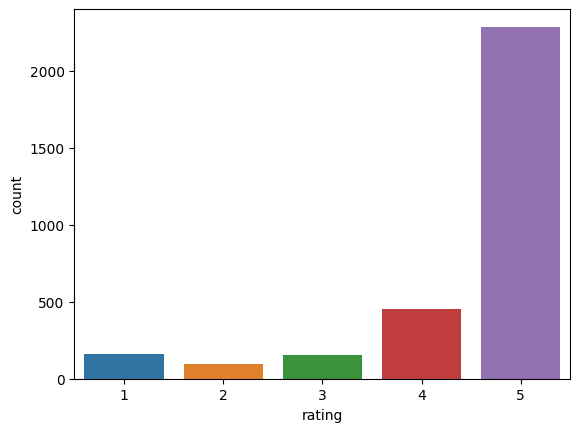

In [7]:
# checking distribution of ratings
sns.countplot(x = df['rating'])

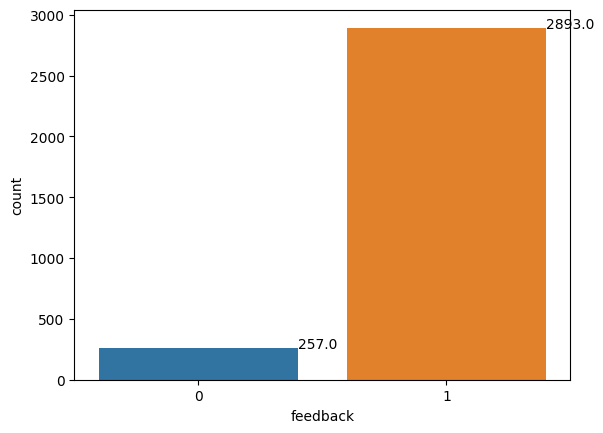

In [17]:
ax = sns.countplot(data = df, x = 'feedback')

#Annotation
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width(), p.get_height()))
plt.show()

+vet = 2893
-ve = 257

In [18]:
# positive reviews
positive = df[df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [19]:
# negative reviews only
negative = df[df['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [20]:
# Convert to list format
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

In [21]:
# Join all reviews into one large string
sentences_as_one_string =" ".join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

(-0.5, 399.5, 199.5, -0.5)

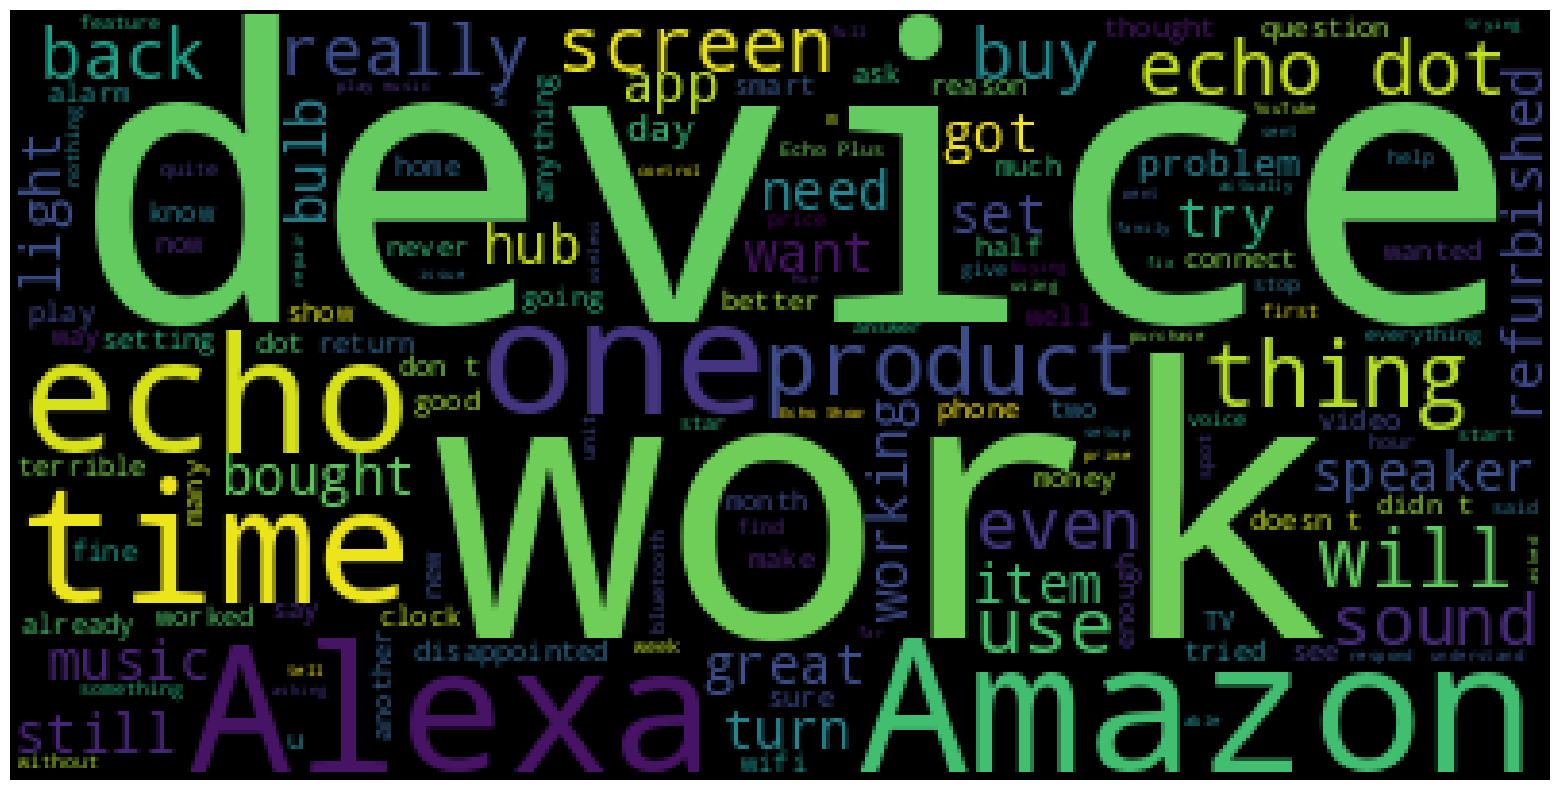

In [30]:
from wordcloud import WordCloud

plt.figure(figsize=(25,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.axis("off")

Positive Review words

(-0.5, 399.5, 199.5, -0.5)

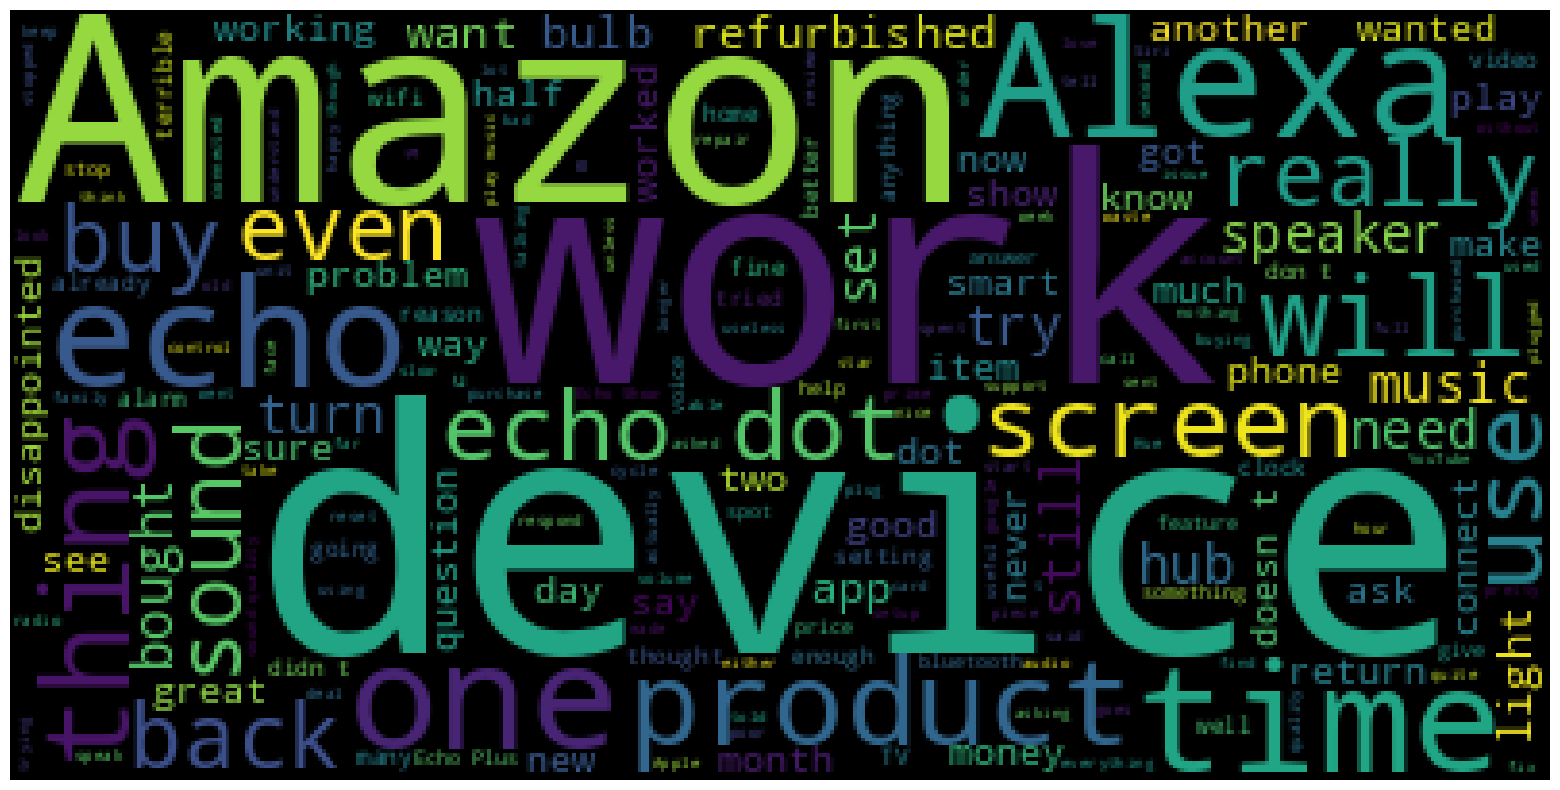

In [31]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (25,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))
plt.axis("off")

Negative Review words

# EDA on data

In [32]:

import string
import nltk # Natural Language tool kit
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

# removing Punctuation
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
#applying function on data
reviews = df['verified_reviews'].apply(message_cleaning)

In [37]:
print(df['verified_reviews'][5:10])

5    I received the echo as a gift. I needed anothe...
6    Without having a cellphone, I cannot use many ...
7    I think this is the 5th one I've purchased. I'...
8                                          looks great
9    Love it! I’ve listened to songs I haven’t hear...
Name: verified_reviews, dtype: object


In [38]:
print(reviews[5:10])

5    [received, echo, gift, needed, another, Blueto...
6    [Without, cellphone, cannot, use, many, featur...
7    [think, 5th, one, Ive, purchased, Im, working,...
8                                       [looks, great]
9    [Love, I’ve, listened, songs, haven’t, heard, ...
Name: verified_reviews, dtype: object


In [39]:
# CountVectorizer


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(df['verified_reviews'])

In [40]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
reviews_countvectorizer.shape

(3150, 5211)

In [42]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
X = reviews
y = df['feedback']

In [43]:
#Train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

              precision    recall  f1-score   support

           0       0.67      0.38      0.48        37
           1       0.96      0.99      0.98       593

    accuracy                           0.95       630
   macro avg       0.81      0.68      0.73       630
weighted avg       0.94      0.95      0.95       630



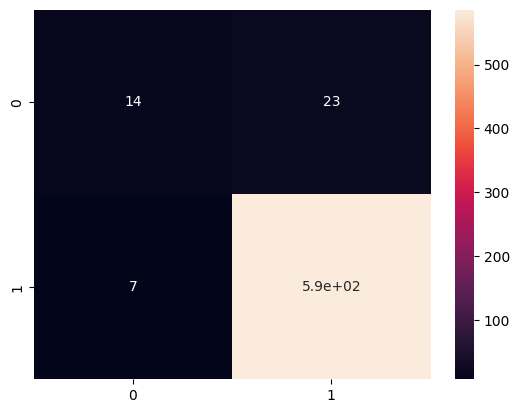

In [44]:
#Naive Bayes model training
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))